Logistic Regression Accuracy: 49.55%
F1 Score: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.47      0.48      4996
           1       0.50      0.52      0.51      5004

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



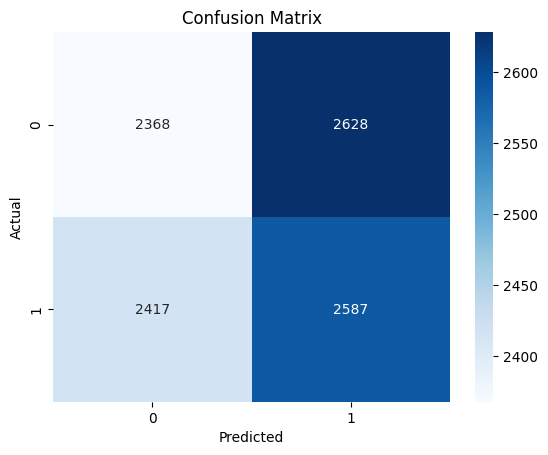

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

# previewing data
#print("Dataset shape:", df.shape)
#print("First few rows:\n", df.head())

# we drop any identifier columns that won't help prediction
df = df.drop(columns=['id', 'user_handle', 'tweet_text'], errors='ignore')



#non_numeric to drop columns that arent numeric before training
non_numeric = ['Username', 'Tweet', 'Location', 'Created At', 'Hashtags']
X = df.drop(columns=non_numeric + ['Bot Label'], errors='ignore')
y = df['Bot Label']

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predict on test set
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.2f}".format(f1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

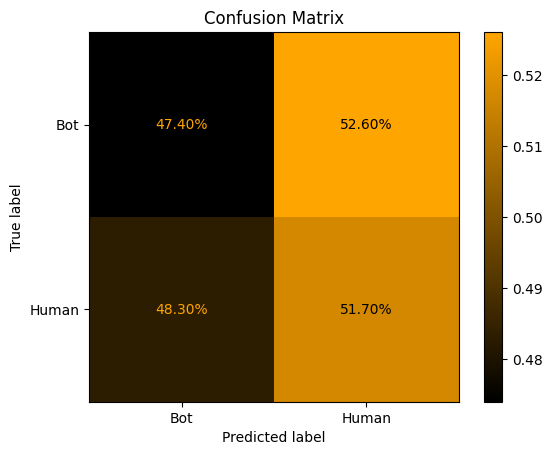

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib.colors import LinearSegmentedColormap

predicted_classes_test = ( y_pred > 0.5 ).astype(int)

cm_test = confusion_matrix(y_test, predicted_classes_test, normalize = 'true')

# display the confusion matrix with colour coding
custom_cmap = LinearSegmentedColormap.from_list('colours',
                                                [(0, 'black'),
                                                 (1, 'orange')] , N = 256)
disp = ConfusionMatrixDisplay( confusion_matrix = cm_test, display_labels = ['Bot', 'Human'] )
disp.plot(cmap = custom_cmap, values_format = '.2%')
plt.title('Confusion Matrix')
plt.show()